<a href="https://colab.research.google.com/github/Shruti-Raj-Vansh-Singh/fastai/blob/master/fastai_1_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai==2.0.12

     |████████████████████████████████| 358kB 13.7MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     |████████████████████████████████| 727kB 14.1MB/s 
     |████████████████████████████████| 1.1MB 57.2MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 194kB 62.1MB/s 
Mounted at /content/gdrive


In [3]:
import fastai
print(fastai.__version__)

2.1.8


In [4]:
from fastai import *
from fastai.vision.widgets import *
from fastai.vision.all import *
from fastai.data.all import *
import os
from PIL import Image

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unzip '/content/drive/My Drive/dataset/cats_and_dogs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: dog vs cat/dataset/training_set/cats/cat.37.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3709.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.371.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3710.jpg  
  inflating: dog vs cat/dataset/training_se

In [7]:
category = 'cat','dog'
path = '/content/dog vs cat/dataset/training_set'

In [8]:
#defining a data block that will be used to fetch the data
block = DataBlock(
                    blocks = (ImageBlock, CategoryBlock),                   #telling  that our data is in the form of images with labels
                    get_items = get_image_files,                            #specify that he type of item is an image
                    splitter = RandomSplitter(valid_pct=0.2, seed=42),      #dividing data into vlaidation and training set
                    get_y = parent_label,                                   #label for the image will be the name of the folder(we can also have the name extracted from the image name uing regular expression)
                    item_tfms = Resize(224),
                    batch_tfms = aug_transforms()
)

In [9]:
dls = block.dataloaders(path)

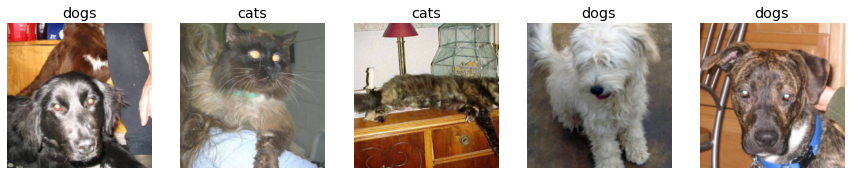

In [10]:
dls.valid.show_batch(max_n=5, nrows=1)

In [11]:
#training our cnn model
model = cnn_learner(dls, resnet50, metrics=error_rate )
model.fine_tune(16)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.129091,0.080115,0.019375,01:12


epoch,train_loss,valid_loss,error_rate,time
0,0.059496,0.038064,0.012500,01:36
1,0.043296,0.046791,0.015000,01:36
2,0.032233,0.034468,0.010625,01:36
3,0.035721,0.055348,0.013750,01:36
4,0.055441,0.021906,0.008750,01:36
5,0.032443,0.035882,0.015625,01:36
6,0.022875,0.034585,0.011875,01:36
7,0.018809,0.026425,0.008125,01:36
8,0.014941,0.024815,0.007500,01:36
9,0.024264,0.031233,0.010625,01:36


In [13]:
#confusion matrix of the output
matrix = ClassificationInterpretation.from_learner(model)
matrix.confusion_matrix()

array([[794,   6],
       [  4, 796]])

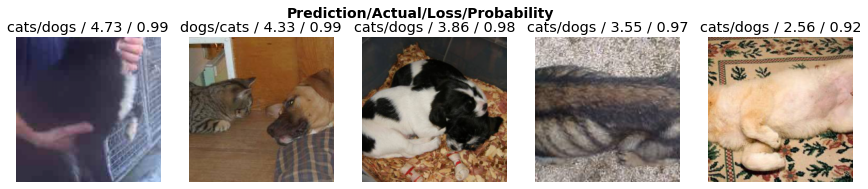

In [14]:
matrix.plot_top_losses(5, nrows=1)

In [ ]:
model.export()